In [164]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [165]:
data = pd.read_csv('Data.csv')

In [166]:
data.shape

(120, 6)

In [167]:
data.head()

,Sucrose concentration in %,RI,Fiber sensing region (cm),Chitosan Wt(gm),LED color,Output Intensity
0,0,1.33,1.0,1,Red,147
1,5,1.34,1.0,1,Red,144
2,10,1.35,1.0,1,Red,140
3,15,1.36,1.0,1,Red,138
4,20,1.37,1.0,1,Red,134


In [168]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 6 columns):
Sucrose concentration in %    120 non-null int64
RI                            120 non-null float64
Fiber sensing region (cm)     120 non-null float64
Chitosan Wt(gm)               120 non-null int64
LED color                     120 non-null object
Output Intensity              120 non-null int64
dtypes: float64(2), int64(3), object(1)
memory usage: 5.8+ KB


In [169]:
data.describe()

,Sucrose concentration in %,RI,Fiber sensing region (cm),Chitosan Wt(gm),Output Intensity
count,120.000000,120.000000,120.000000,120.000000,120.000000
mean,22.500000,1.375000,1.750000,1.500000,139.075000
std,14.421622,0.028843,0.753145,0.502096,13.205654
min,0.000000,1.330000,1.000000,1.000000,112.000000
25%,10.000000,1.350000,1.000000,1.000000,129.000000
50%,22.500000,1.375000,1.750000,1.500000,139.000000
75%,35.000000,1.400000,2.500000,2.000000,148.250000
max,45.000000,1.420000,2.500000,2.000000,172.000000


In [170]:
# rename the columns
data = data.rename(columns={'Sucrose concentration in %': 'Sucrose_Concentration','Fiber sensing region (cm) ': 'Fiber_Sensing_Region'
                            ,'Chitosan Wt(gm)':'Chitosan_Weight','LED color':'LED_Color'
                            ,'RI':'Refractive_Index','Output Intensity ':'Output_Intensity'})

In [171]:
data.head()

,Sucrose_Concentration,Refractive_Index,Fiber_Sensing_Region,Chitosan_Weight,LED_Color,Output_Intensity
0,0,1.33,1.0,1,Red,147
1,5,1.34,1.0,1,Red,144
2,10,1.35,1.0,1,Red,140
3,15,1.36,1.0,1,Red,138
4,20,1.37,1.0,1,Red,134


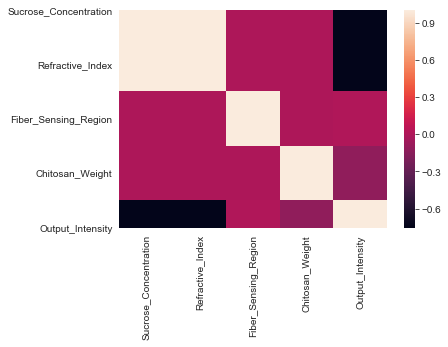

In [172]:
sns.heatmap(data.corr())

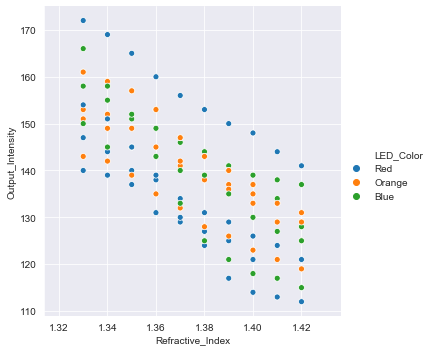

In [173]:
import seaborn as sns
sns.set_style(style="darkgrid")
sns.relplot(x="Refractive_Index", y="Output_Intensity",hue="LED_Color", data=data);

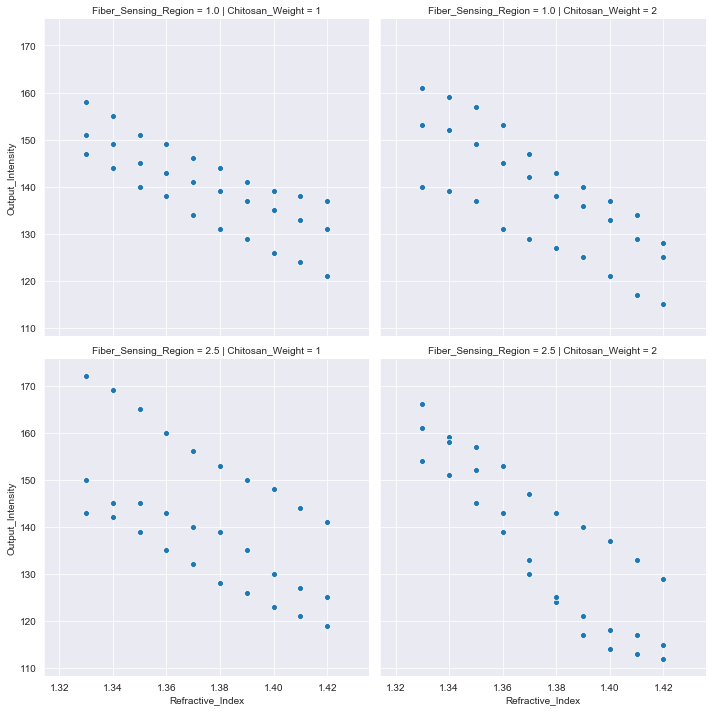

In [174]:
sns.relplot(x="Refractive_Index", y="Output_Intensity",col='Chitosan_Weight',row='Fiber_Sensing_Region', data=data);

In [175]:
data.isna().sum()

Sucrose_Concentration    0
Refractive_Index         0
Fiber_Sensing_Region     0
Chitosan_Weight          0
LED_Color                0
Output_Intensity         0
dtype: int64

In [176]:
for col in data.select_dtypes(['object']).columns:
    print(col,':',data[col].nunique())

LED_Color : 3


In [177]:
data = pd.get_dummies(data, columns=['LED_Color'])

In [178]:
data.head()

,Sucrose_Concentration,Refractive_Index,Fiber_Sensing_Region,Chitosan_Weight,Output_Intensity,LED_Color_Blue,LED_Color_Orange,LED_Color_Red
0,0,1.33,1.0,1,147,0,0,1
1,5,1.34,1.0,1,144,0,0,1
2,10,1.35,1.0,1,140,0,0,1
3,15,1.36,1.0,1,138,0,0,1
4,20,1.37,1.0,1,134,0,0,1


In [179]:
data.drop(['LED_Color_Orange'],axis=1,inplace=True)

In [180]:
data.head()

,Sucrose_Concentration,Refractive_Index,Fiber_Sensing_Region,Chitosan_Weight,Output_Intensity,LED_Color_Blue,LED_Color_Red
0,0,1.33,1.0,1,147,0,1
1,5,1.34,1.0,1,144,0,1
2,10,1.35,1.0,1,140,0,1
3,15,1.36,1.0,1,138,0,1
4,20,1.37,1.0,1,134,0,1


In [181]:
# sns.heatmap(data.corr())

In [182]:
from sklearn.model_selection import train_test_split

In [183]:
train,test=train_test_split(data,train_size=0.80,random_state=42)

In [184]:
train.shape,test.shape

((96, 7), (24, 7))

In [185]:
train.reset_index(inplace=True)
test.reset_index(inplace=True)

In [186]:
del train['index']
del test['index']

In [187]:
train.head()

,Sucrose_Concentration,Refractive_Index,Fiber_Sensing_Region,Chitosan_Weight,Output_Intensity,LED_Color_Blue,LED_Color_Red
0,10,1.35,1.0,2,149,0,0
1,10,1.35,1.0,1,145,0,0
2,25,1.38,1.0,1,139,0,0
3,20,1.37,2.5,2,133,1,0
4,30,1.39,2.5,1,126,0,0


In [188]:
test.head()

,Sucrose_Concentration,Refractive_Index,Fiber_Sensing_Region,Chitosan_Weight,Output_Intensity,LED_Color_Blue,LED_Color_Red
0,20,1.37,1.0,2,142,0,0
1,35,1.40,1.0,2,133,0,0
2,20,1.37,1.0,1,134,0,1
3,25,1.38,1.0,2,143,1,0
4,30,1.39,1.0,1,141,1,0


In [189]:
x_train=train.drop('Output_Intensity',axis=1)
y_train=train['Output_Intensity']
x_test=test.drop('Output_Intensity',axis=1)
y_test=test['Output_Intensity']

In [190]:
x_train_svm = x_train.copy()
x_test_svm = x_test.copy()

In [191]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train_svm)
X_train = scaler.transform(x_train_svm)
X_test = scaler.transform(x_test_svm)

## Model Building

In [192]:
from sklearn import svm
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [193]:
svr = svm.SVR(kernel='rbf',C=57,gamma='auto')

In [194]:
svr.fit(X_train,y_train)

SVR(C=57, gamma='auto')

In [195]:
y_pred=svr.predict(X_test)

In [196]:
mean_absolute_error(y_test,y_pred)

0.6825908951009337

In [197]:
mean_squared_error(y_test,y_pred,squared=False) #RMSE

0.8883497964102739

In [198]:
r2_score(y_test,y_pred)

0.9924900996594876

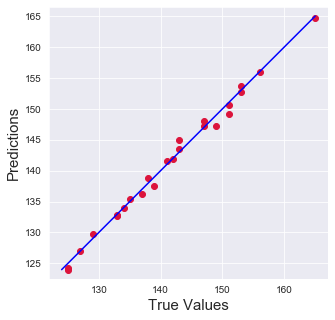

In [199]:
plt.figure(figsize=(5,5))
plt.scatter(y_test, y_pred, c='crimson')

p1 = max(max(y_pred), max(y_test))
p2 = min(min(y_pred), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

In [200]:
y_pred_trn=svr.predict(X_train)

In [201]:
y_pred_trn = pd.DataFrame(y_pred_trn)

In [202]:
mean_absolute_error(y_train,y_pred_trn)

0.41657792029521873

In [203]:
mean_squared_error(y_train,y_pred_trn,squared=False)

0.6507952122312313

In [204]:
r2_score(y_train,y_pred_trn)

0.9977478944096513

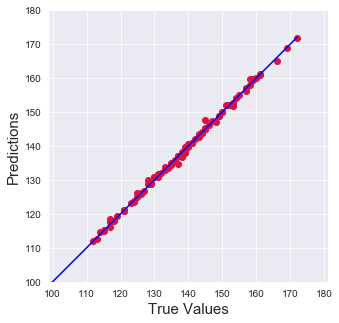

In [205]:
plt.figure(figsize=(5,5))
plt.scatter(y_train, y_pred_trn, c='crimson')
p1 = max(max(y_pred_trn), max(y_train))
p2 = min(min(y_pred_trn), min(y_train))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.xlim([100,180]) 
plt.ylim([100,180]) 
plt.show()

## Feature Importance List

Feature ranking:
1. feature Sucrose_Concentration (0.434491)
2. feature Refractive_Index (0.413371)
3. feature Fiber_Sensing_Region (0.063496)
4. feature Chitosan_Weight (0.044486)
5. feature LED_Color_Blue (0.026989)
6. feature LED_Color_Red (0.017167)


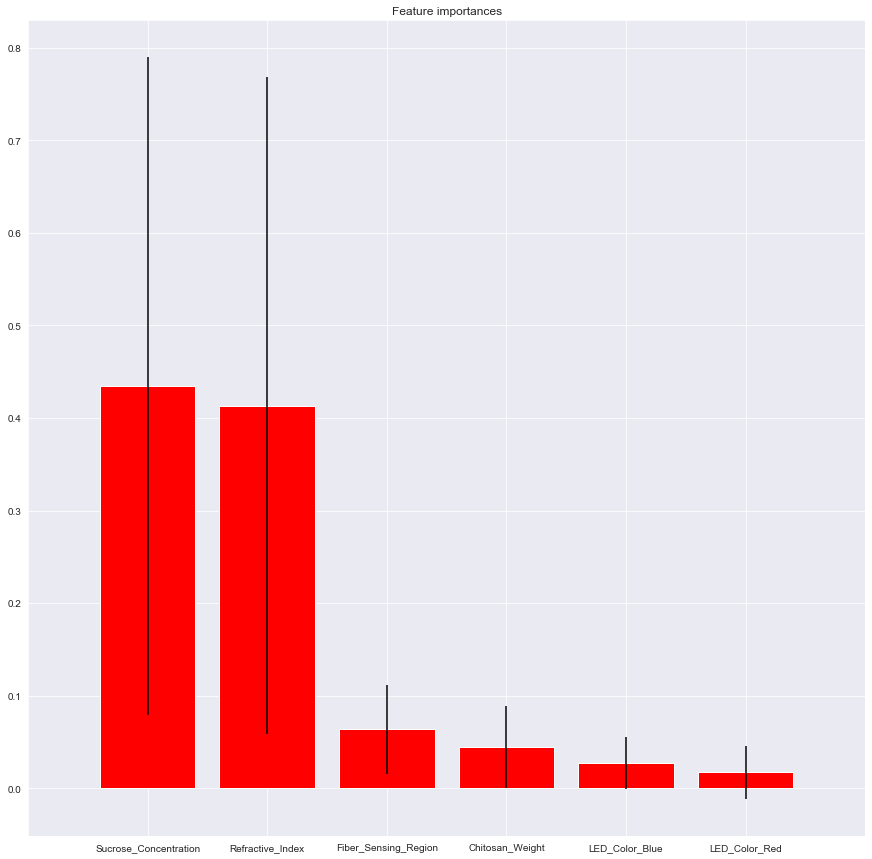

In [212]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV


param_dist = {"n_estimators":[100,200,300,350],
             "max_features": [1,2,3,4,5],
             "bootstrap": [True, False],
             "max_depth":[None,5,10,15,20,30,50],
             "min_samples_leaf":[1,5,10,15,20,50],
             "min_samples_split":[2,5,10,15,20,50]}

reg_rf = RandomForestRegressor()

random_search = RandomizedSearchCV(reg_rf,param_distributions=param_dist,n_iter=10,scoring='neg_mean_absolute_error'
                                   ,cv=10, n_jobs=-1,verbose=False)

random_search.fit(X_train,y_train)

rf=random_search.best_estimator_

rf.fit(X_train,y_train)

importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(x_train.shape[1]):
    print("%d. feature %s (%f)" % (f + 1, list(x_train.columns)[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure(figsize =(15, 15))
plt.title("Feature importances")
plt.bar(range(x_train.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(x_train.shape[1]), labels=list(x_train.columns))
plt.xlim([-1, x_train.shape[1]])

plt.show()

In [213]:
y_test.iloc[0]

142

In [214]:
y_pred = pd.DataFrame(y_pred)

In [215]:
y_pred.head()

,0
0,141.951881
1,132.630361
2,133.954328
3,143.496077
4,141.570407


In [216]:
y_test.head()

0    142
1    133
2    134
3    143
4    141
Name: Output_Intensity, dtype: int64

In [217]:
X_train =scaler.inverse_transform(X_train)
X_test = scaler.inverse_transform(X_test)

In [218]:
X_train = pd.DataFrame(X_train,columns=['Sucrose_Concentration', 'Refractive_Index', 'Fiber_Sensing_Region',
       'Chitosan_Weight', 'LED_Color_Blue', 'LED_Color_Red'])

X_test = pd.DataFrame(X_test,columns=['Sucrose_Concentration', 'Refractive_Index', 'Fiber_Sensing_Region',
       'Chitosan_Weight', 'LED_Color_Blue', 'LED_Color_Red'])

In [219]:
X_train.head()

,Sucrose_Concentration,Refractive_Index,Fiber_Sensing_Region,Chitosan_Weight,LED_Color_Blue,LED_Color_Red
0,10.0,1.35,1.0,2.0,0.0,0.0
1,10.0,1.35,1.0,1.0,0.0,0.0
2,25.0,1.38,1.0,1.0,0.0,0.0
3,20.0,1.37,2.5,2.0,1.0,0.0
4,30.0,1.39,2.5,1.0,0.0,0.0


In [220]:
# create a list of our conditions
conditions = [
    (X_train['LED_Color_Red']==0.0) & (X_train['LED_Color_Blue']==0.0),
    (X_train['LED_Color_Red']==0.0) & (X_train['LED_Color_Blue']==1.0),
    (X_train['LED_Color_Red']==1.0) & (X_train['LED_Color_Blue']==0.0)
    ]

# create a list of the values we want to assign for each condition
values = ['Orange', 'Blue', 'Red']

# create a new column and use np.select to assign values to it using our lists as arguments
X_train['LED_Color'] = np.select(conditions, values)



In [221]:
X_train.head()

,Sucrose_Concentration,Refractive_Index,Fiber_Sensing_Region,Chitosan_Weight,LED_Color_Blue,LED_Color_Red,LED_Color
0,10.0,1.35,1.0,2.0,0.0,0.0,Orange
1,10.0,1.35,1.0,1.0,0.0,0.0,Orange
2,25.0,1.38,1.0,1.0,0.0,0.0,Orange
3,20.0,1.37,2.5,2.0,1.0,0.0,Blue
4,30.0,1.39,2.5,1.0,0.0,0.0,Orange


In [222]:
# create a list of our conditions
conditions = [
    (X_test['LED_Color_Red']==0.0) & (X_test['LED_Color_Blue']==0.0),
    (X_test['LED_Color_Red']==0.0) & (X_test['LED_Color_Blue']==1.0),
    (X_test['LED_Color_Red']==1.0) & (X_test['LED_Color_Blue']==0.0)
    ]

# create a list of the values we want to assign for each condition
values = ['Orange', 'Blue', 'Red']

# create a new column and use np.select to assign values to it using our lists as arguments
X_test['LED_Color'] = np.select(conditions, values)



In [223]:
X_test.head()

,Sucrose_Concentration,Refractive_Index,Fiber_Sensing_Region,Chitosan_Weight,LED_Color_Blue,LED_Color_Red,LED_Color
0,20.0,1.37,1.0,2.0,0.0,0.0,Orange
1,35.0,1.40,1.0,2.0,0.0,0.0,Orange
2,20.0,1.37,1.0,1.0,0.0,1.0,Red
3,25.0,1.38,1.0,2.0,1.0,0.0,Blue
4,30.0,1.39,1.0,1.0,1.0,0.0,Blue


In [224]:
X_train.drop(['LED_Color_Blue','LED_Color_Red'],axis=1,inplace=True)
X_test.drop(['LED_Color_Blue','LED_Color_Red'],axis=1,inplace=True)

In [225]:
X_train.head()

,Sucrose_Concentration,Refractive_Index,Fiber_Sensing_Region,Chitosan_Weight,LED_Color
0,10.0,1.35,1.0,2.0,Orange
1,10.0,1.35,1.0,1.0,Orange
2,25.0,1.38,1.0,1.0,Orange
3,20.0,1.37,2.5,2.0,Blue
4,30.0,1.39,2.5,1.0,Orange


In [226]:
X_test.head()

,Sucrose_Concentration,Refractive_Index,Fiber_Sensing_Region,Chitosan_Weight,LED_Color
0,20.0,1.37,1.0,2.0,Orange
1,35.0,1.40,1.0,2.0,Orange
2,20.0,1.37,1.0,1.0,Red
3,25.0,1.38,1.0,2.0,Blue
4,30.0,1.39,1.0,1.0,Blue


In [227]:
Y_Predicted_train = pd.DataFrame(y_pred_trn.values,columns=['Predicted_Output_Intensity'])
Y_Actual_train = pd.DataFrame(y_train.values,columns=["Actual_Output_Intensity"])
Final_Comparison_train=pd.concat([X_train,Y_Actual_train,Y_Predicted_train],axis=1)

In [228]:
Final_Comparison_train.head()

,Sucrose_Concentration,Refractive_Index,Fiber_Sensing_Region,Chitosan_Weight,LED_Color,Actual_Output_Intensity,Predicted_Output_Intensity
0,10.0,1.35,1.0,2.0,Orange,149,148.900111
1,10.0,1.35,1.0,1.0,Orange,145,145.100157
2,25.0,1.38,1.0,1.0,Orange,139,138.972628
3,20.0,1.37,2.5,2.0,Blue,133,133.659652
4,30.0,1.39,2.5,1.0,Orange,126,125.899582


In [229]:
Y_Predicted_test = pd.DataFrame(y_pred.values,columns=['Predicted_Output_Intensity'])
Y_Actual_test = pd.DataFrame(y_test.values,columns=["Actual_Output_Intensity"])
Final_Comparison_test=pd.concat([X_test,Y_Actual_test,Y_Predicted_test],axis=1)

In [230]:
Final_Comparison_test.head(10)

,Sucrose_Concentration,Refractive_Index,Fiber_Sensing_Region,Chitosan_Weight,LED_Color,Actual_Output_Intensity,Predicted_Output_Intensity
0,20.0,1.37,1.0,2.0,Orange,142,141.951881
1,35.0,1.40,1.0,2.0,Orange,133,132.630361
2,20.0,1.37,1.0,1.0,Red,134,133.954328
3,25.0,1.38,1.0,2.0,Blue,143,143.496077
4,30.0,1.39,1.0,1.0,Blue,141,141.570407
5,20.0,1.37,2.5,1.0,Red,156,156.014200
6,15.0,1.36,2.5,1.0,Orange,135,135.471333
7,0.0,1.33,1.0,1.0,Orange,151,149.117455
8,0.0,1.33,1.0,2.0,Orange,153,153.711175
9,35.0,1.40,2.5,2.0,Orange,137,136.215302


In [231]:
Final_Comparison_test.shape,Final_Comparison_train.shape

((24, 7), (96, 7))

In [232]:
Final_Comparison = pd.concat([Final_Comparison_train,Final_Comparison_test],axis=0)

In [233]:
Final_Comparison.shape

(120, 7)

In [234]:
Final_Comparison.head()

,Sucrose_Concentration,Refractive_Index,Fiber_Sensing_Region,Chitosan_Weight,LED_Color,Actual_Output_Intensity,Predicted_Output_Intensity
0,10.0,1.35,1.0,2.0,Orange,149,148.900111
1,10.0,1.35,1.0,1.0,Orange,145,145.100157
2,25.0,1.38,1.0,1.0,Orange,139,138.972628
3,20.0,1.37,2.5,2.0,Blue,133,133.659652
4,30.0,1.39,2.5,1.0,Orange,126,125.899582


In [235]:
Final_Comparison.iloc[96]

Sucrose_Concentration              20
Refractive_Index                 1.37
Fiber_Sensing_Region                1
Chitosan_Weight                     2
LED_Color                      Orange
Actual_Output_Intensity           142
Predicted_Output_Intensity    141.952
Name: 0, dtype: object

In [236]:
Final_Comparison['Error_Percentage']=(Final_Comparison['Actual_Output_Intensity'] - Final_Comparison['Predicted_Output_Intensity']) * 100 /Final_Comparison['Actual_Output_Intensity']

In [237]:
Final_Comparison.head()

,Sucrose_Concentration,Refractive_Index,Fiber_Sensing_Region,Chitosan_Weight,LED_Color,Actual_Output_Intensity,Predicted_Output_Intensity,Error_Percentage
0,10.0,1.35,1.0,2.0,Orange,149,148.900111,0.067040
1,10.0,1.35,1.0,1.0,Orange,145,145.100157,-0.069074
2,25.0,1.38,1.0,1.0,Orange,139,138.972628,0.019692
3,20.0,1.37,2.5,2.0,Blue,133,133.659652,-0.495979
4,30.0,1.39,2.5,1.0,Orange,126,125.899582,0.079697


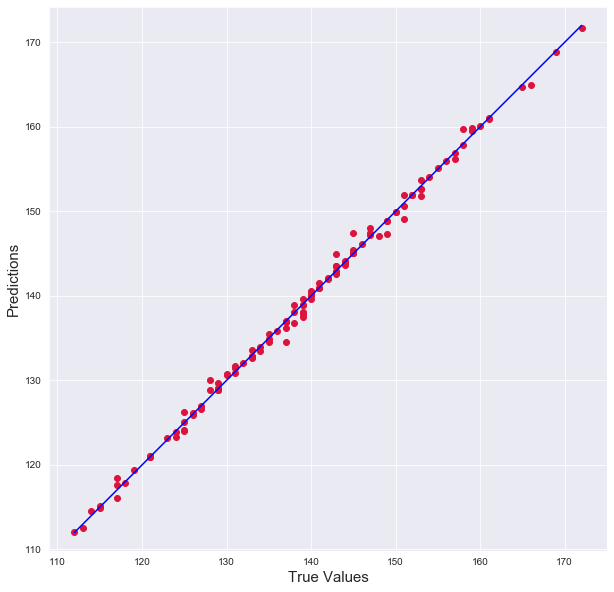

In [238]:
plt.figure(figsize=(10,10))
plt.scatter(Final_Comparison['Actual_Output_Intensity'],Final_Comparison['Predicted_Output_Intensity'], c='crimson')

p1 = max(max(Final_Comparison['Predicted_Output_Intensity']), max(Final_Comparison['Actual_Output_Intensity']))
p2 = min(min(Final_Comparison['Predicted_Output_Intensity']), min(Final_Comparison['Actual_Output_Intensity']))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

In [239]:
Final_Comparison.to_csv('SVM_RI.csv',index=False)